#  Schottky kontakt

<div style="float: left;">Indrek Jõgi<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 7.12.2018</div>

Selle töölehe eesmärk on näidata Schottky kontakti moodustumist metalli ja pooljuhi piirpinnal, kus potentsiaalide vahe $\Delta \phi$ tõttu metallis ja pooljuhi sisemuses liiguvad vabad laengukandjad õhukeses piirpinna kihis elektroodi ja moodustub ruumlaeng $\rho_d$. Analoogiliselt tekib plasmas (ja ka elektrolüüdis) katoodkiht.<br> Tekkinud ruumlaeng ulatub x telje suunas piirpinnast pooljuhti kaugusele $d$, samas kui piirpinna ja ruumlaengu ulatus y ning z telje suunas on palju suurem (võib võtta lõpmata suureks). Potentsiaalide erinevuse poolt põhjustatud ruumlaenguga kiht tekitab elektrivälja, mis takistab laengukandjate edasist liikumist. Lihtsaima mudeli korral on ruumlaeng ühtlase väärtusega (kõik vabad laengukandjad on piirkihist kadunud) ja ulatub pooljuhis kaugusele, kus potentsiaal on saanud võrdseks pooljuhi potentsiaaliga. Elektrivälja ja potentsiaali leidmiseks piirkihis tuleb lahendada Poissoni võrrand:

$$\frac{\partial^2 \varphi}{\partial x^2} = - \frac{\rho}{\varepsilon \varepsilon_0}.$$ 

Seejuures on elektriväli määratud potentsiaali gradiendina: $$E = -\frac{\partial \varphi}{\partial x}.$$ 

Ääretingimusteks on: $E = 0$ mingil kaugusel $x = d$ ning $\varphi = V$ kaugusel $x = 0$ või kaugusel $x = d$. Selliste ääretingimuste korral ei saa Pythonis lihtsat $odeint$ funktsiooni kasutada ja seetõttu on lahendamisel kasutatud teist lähenemist.



Alustuseks lahendame Gaussi võrrandi ja Poissoni võrrandi etteantud ruumlaengu $\rho$ (vabade positiivsete laengukandjate tiheduse $n_d$) korral, mis ulatub pooljuhis kauguseni $d$ ja sealt edasi on ruumlaeng $0$. Esimese näite korral on $E = 0$ kaugusel $x = 0$. 


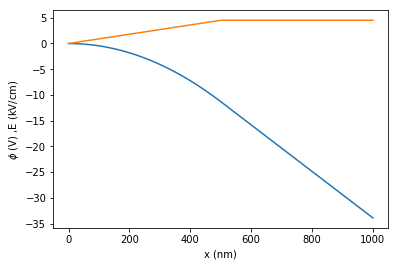

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Teistjärku tuletise leidmiseks tuleb diferentsiaalvõrrand jagada kaheks osaks ning lahendada tekkinud võrrandisüsteem.
def model(A, x, n, d):
    # A on vektor, kus f=A[0] ja e=A[1]. Funktsioon A peaks tagastama [f', e']
    f = A[0]  # potentsiaal
    e = A[1]  # elektriväli
    if (x<d):
        roo = n*1.6e-19  # ruumlaengu tihedus arvutatuna doonorite tihedusest
    else:
        roo = 0
    dfdx = -e
    dedx = roo/8.85e-14 # epsilon nulliga [F/cm] läbi jagamine
    return [dfdx, dedx]

Nd = 5.0e15 # vabade laengukandjate tihedus cm3 kohta (antud juhul positiivsed ehk määratud doonorite tihedusega)
d = 500     # konstantse laengutiheduse ulatus nanomeetrites

x = np.linspace(0, 1.0e-4, 1000)

A0 = [0, 0*1e5] #algtingimused potentsiaali (V) ja elektrivälja (kV/cm) jaoks piirpinnal 0, 1e5 on ühikute teisendamiseks
As = odeint(model, A0, x, args=(Nd,d*1e-7))   # d teisendatakse sentimeetriteks
fs = As[:,0]     # ühikud V
Es = As[:,1]/1e5 # ühikud kV/cm


def graafik(fs,Es):
    plt.xlabel("x (nm)")
    plt.ylabel("$\phi$ (V) ,E (kV/cm)")
    plt.plot(x*1e7,fs);
    plt.plot(x*1e7,Es);
    plt.show()

graafik(fs,Es)

Ülaltoodud juhul on ruumlaengu ulatus fikseeritud kauguseni 500 nm. Elektriväli $E$ kasvab kuni selle kauguseni lineaarselt ja jääb seejärel konstantsele väärtusele (antud juhul $E = 4.5 kV/cm$). Potentsiaal $\varphi$ väheneb ruutsõltuvusena sellele kaugusele ja seejärel muutub lineaarselt. Võite läbi proovida kauguse $d$ ja laengutiheduse $n_d$ mõju elektriväljale ja potentsiaalile.


Tegelikult peaks elektriväli olema pooljuhi sügavuses 0 ja järelikult positiivse laengutiheduse korral pinna suunas negatiivne. Järelikult on vaja leida selline elektrivälja väärtus piirpinnal, kus antud ruumlaengu/laengukandjate tiheduse korral kahaneks elektriväli pooljuhi sees nulliks. Allpool on seda tehtud lihtsa proovimise abil, kus piirpinna elektrivälja (negatiivne väärtus) suurendatakse seni, kuni elektriväli saavutab pooljuhi sisemuses nulli (tingimusena esimene algväärtus, mille korral jääb negatiivseks).

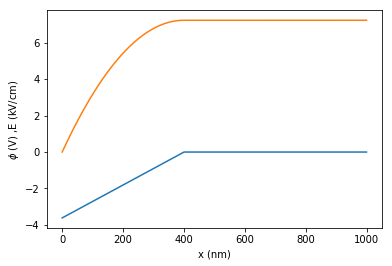

Elektriväli piirpinnal E0 = -3.616 kV/m ja potentsiaal  V =  7.23344618251


In [10]:
def Eväli(t):
    i = 0
    while 1:
        A0 = [0, -i*0.001*1e5] #muuda E välja piirpinnal
        As = odeint(model, A0, x, args=(Nd,t*1e-7))   # d teisendatakse sentimeetriteks
        i=i+1
        fs = As[:,0]
        Es = As[:,1]/1e5 # ühikud kV/cm
        if (Es[999]<0):
            break
    return fs, Es

d = 400

B = Eväli(d)

fi = B[0]
E = B[1]

graafik(E,fi)
print('Elektriväli piirpinnal E0 =', E[0], 'kV/m ja potentsiaal  V = ', fi[999])

Antud juhul muutub elektriväli -3.6 kV. Potentsiaal kasvab seejuures 7.2 V. Reaalsuses on potentsiaalide erinevus elektroodis ja pooljuhi sisemuses etteantud suurus ja ruumlaengu ulatus $d$ kohaneb vastavalt olukorrale. Seega tuleb programmi täiustada nii, et ka $d$ varieerub, võimaldades saavutada etteantud potentsiaalide vahet.

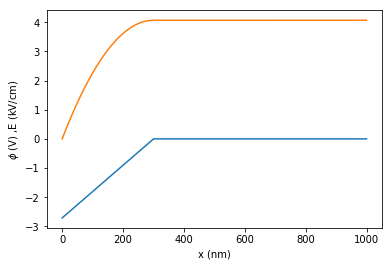

Elektriväli piirpinnal E0 = -2.712 kV/m, potentsiaal V =  4.06915222957 V ja ruumlaengu ulatus on d = 320 nm


In [12]:
d = 20
fi0 = 4
while 1:
    B = Eväli(d)
    fi = B[0]
    E = B[1]
    d = d+20
    if (fi[999]>fi0):
        break
        
graafik(E,fi)

print('Elektriväli piirpinnal E0 =', E[0], 'kV/m, potentsiaal V = ', fi[999], 'V ja ruumlaengu ulatus on d =', d, 'nm')

Kontrollküsimused:

 - Kuidas mõjutab Schottky kontakti ulatust elektronide tihedus ja potentsiaalide vahe?<br>
 - Lisage graafikule ka laengutihedus!<br>
 - Milline on Schottky kontakti kogulaeng pinnaühiku kohta?<br>